In [1]:
import pickle
from corpgame import PolymatrixGame
from genetic import *
import numpy as np
from sklearn.metrics import mean_squared_error
population = pickle.load(open('./data/optimization/population_edgeval_1.499.pickle','rb'))
new_population = create_population(1,[0.1])
for i in [0,55]:
    print(population[i]['error'], evaluate_edge(population[i]), population[i]['alpha'])

Creating 1 new hypotheses
1.4998973325224825 1.4998973325224825 0.0015192957631572305
4.36326337976073 4.36326337976073 0.011593183444243184


In [3]:
population[0]['starting_state'][0][1]

array([37844, 46141])

In [6]:
Y=[]
A = list(np.arange(0,50000,1000))
for k, p in enumerate([population[1], population[55],new_population[0]]):
    hypothesis = p
    y = []
    for a in A:
        hypothesis['starting_state'][0][1]=a
        err = evaluate_edge(hypothesis)
        err_net = evaluate(hypothesis)
        print(k, a, err, err_net)
        y.append(err)
    Y.append(y)

0 0 1.5220191393984006 10.712053553813773
0 1000 1.52168059519474 10.711290030180953
0 2000 1.5213446603709966 10.710593625430068
0 3000 1.5210113427423009 10.70996435265413
0 4000 1.5206806500939707 10.709402223686945
0 5000 1.5203525901807569 10.708907249102
0 6000 1.5200271707260897 10.70847943821145
0 7000 1.5197043994213202 10.708118799065279
0 8000 1.5193842839249614 10.707825338450508
0 9000 1.5190668318619256 10.707599061890576
0 10000 1.5187520508227605 10.707439973644815
0 11000 1.5184399483628814 10.707348076708044
0 12000 1.5181305320018061 10.707323372810302
0 13000 1.5178238092223806 10.707365862416665
0 14000 1.5175197874700115 10.70747554472722
0 15000 1.5172184741518902 10.70765241767713
0 16000 1.5169198766362202 10.70789647793683
0 17000 1.5166240022514408 10.708207720912347
0 18000 1.5163308582854513 10.70858614074572
0 19000 1.5160404519848332 10.70903173031556
0 20000 1.5157527905540722 10.709544481237726
0 21000 1.5154678811547797 10.710124383866091
0 22000 1.515

Text(0, 0.5, 'Average RMSE per edge')

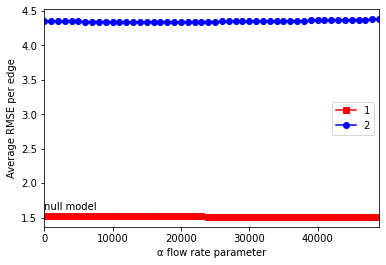

In [10]:
# Visualize
names = ['1', '2', '3']
results = {names[i]:[] for i in range(len(Y))}
for i, y in enumerate(Y):
    results[names[i]] = y
del results['3']
results

import pandas as pd
style = ['rs-','bo-','y^-']
df = pd.DataFrame(results, index=A)
ax = df.plot.line(style=style)
ax.hlines(1.6,0.0,0.0035, linestyles='dashed')
ax.annotate('null model', (0.0015, 1.62))
ax.set_xlabel('α flow rate parameter')
ax.set_ylabel('Average RMSE per edge')